In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


As we have imported the data. So shape method will show us the dimension of the dataset.

In [3]:
dataset.shape

(2919, 13)

#Data Preprocessing
Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them.

In [5]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("categorical variables:", len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

f1 = (dataset.dtypes == 'float')
f1_cols = list(f1[f1].index)
print("Float variables:", len(f1_cols))

categorical variables: 4
Integer variables: 6
Float variables: 3


#Exploratory Data Analysis
EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables.

So here let’s make a heatmap using seaborn library.

<Axes: >

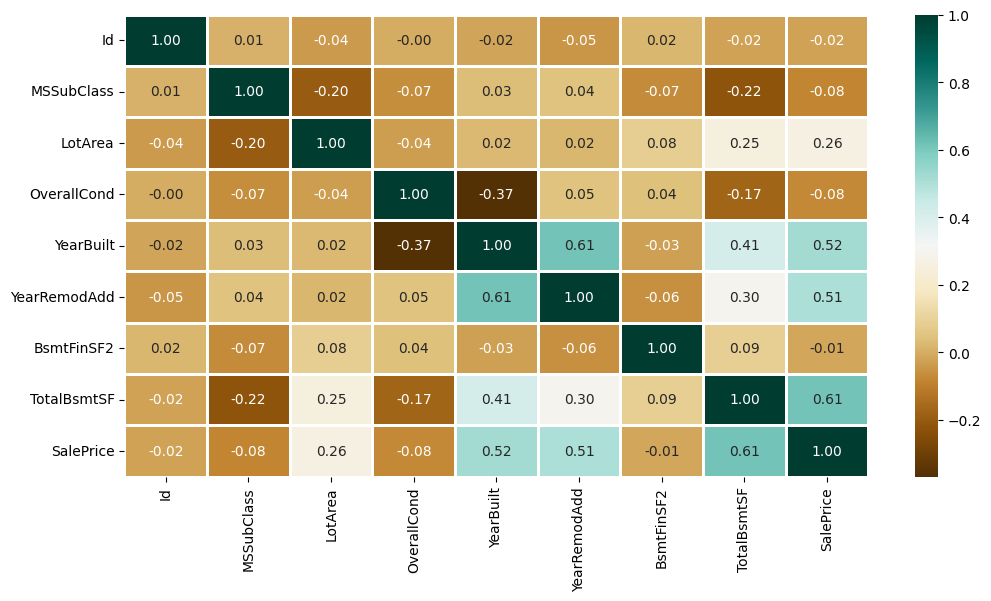

In [8]:
# Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

# This code is modified by Susobhan Akhuli


To analyze the different categorical features. Let’s draw the barplot.

<ipython-input-16-fb72982be907>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=object_cols,y=unique_values, palette=colors)


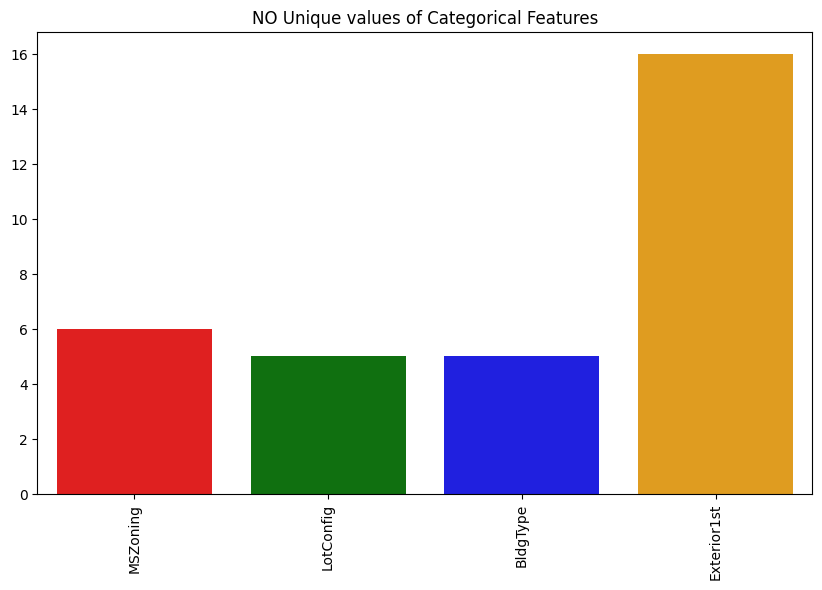

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
unique_values =[]
for col in object_cols:
  unique_values.append(dataset[col].unique().size)

colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(10,6))
plt.title('NO Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values, palette=colors)
plt.show()

The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

<ipython-input-21-8370a862c48c>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


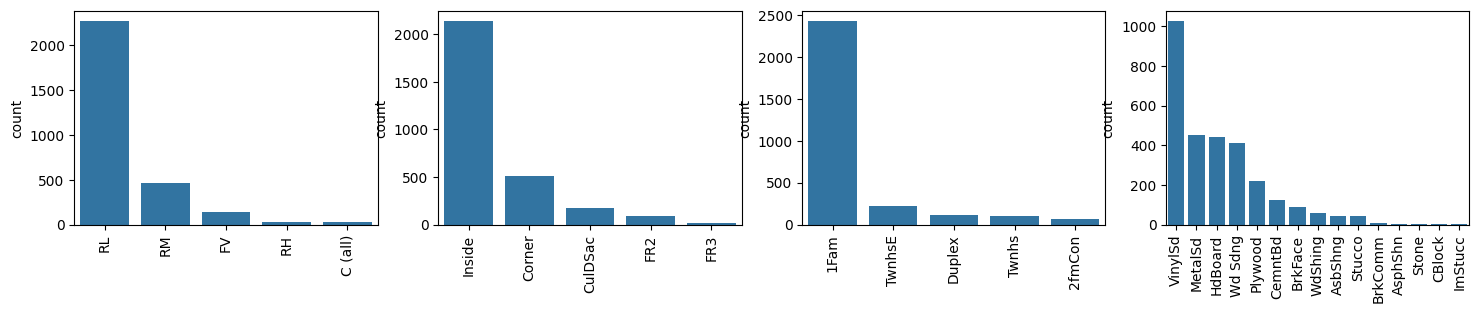

In [21]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


# Data Cleaning
Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the model training. So, we can drop that column before training. There are 2 approaches to dealing with empty/null values

We can easily delete the column/row (if the feature or record is not much important).
Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).
As Id Column will not be participating in any prediction. So we can Drop it.

In [22]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [23]:
dataset['SalePerice'] = dataset['SalePrice'].fillna(
    dataset['SalePrice'].mean()
)

Drop records with null values (as the empty records are very less).

In [24]:
new_dataset = dataset.dropna()

Checking features which have null values in the new dataframe (if there are still any).

In [25]:
new_dataset.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


OneHotEncoder – For Label categorical features
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [27]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.

In [29]:
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# This code is modified by Susobhan Akhuli


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


#Model and Accuracy
As we have to train the model to determine the continuous values, so we will be using these regression models.

SVM-Support Vector Machine
Random Forest Regressor
Linear Regressor
And To calculate loss we will be using the mean_absolute_percentage_error module. It can easily be imported by using sklearn library. The formula for Mean Absolute Error :


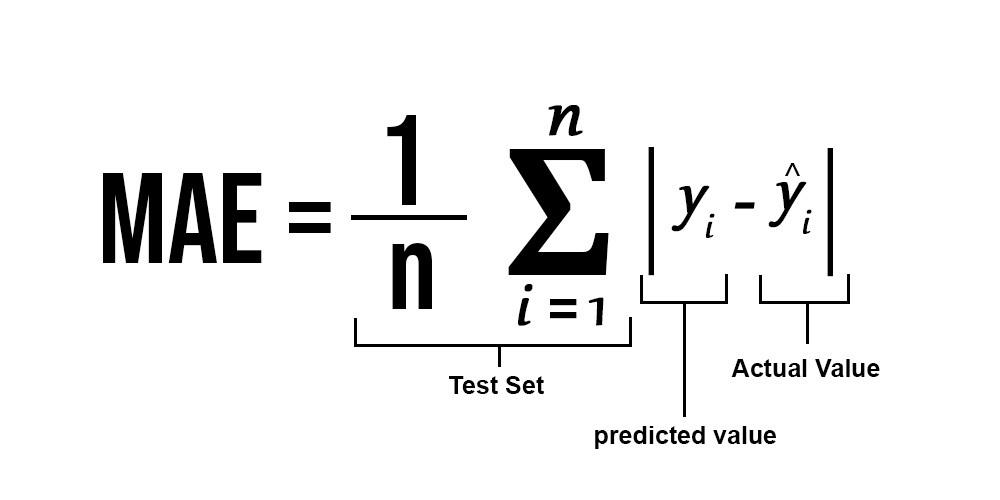

SVM – Support vector Machine
SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane.

In [34]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.30046233555360713


#Random Forest Regression
Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks.

In [36]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.00215362177841635

#Linear Regression
Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc.

In [38]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


4.807879935620783e-16


#CatBoost Classifier
CatBoost is a machine learning algorithm implemented by Yandex and is open-source. It is simple to interface with deep learning frameworks such as Apple’s Core ML and Google’s TensorFlow. Performance, ease-of-use, and robustness are the main advantages of the CatBoost library.

In [39]:
# This code is contributed by @amartajisce
!pip install catboost # install the catboost package
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

# This code is modified by Susobhan Akhuli


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00
Learning rate set to 0.04196
0:	learn: 75803.7339161	total: 48.4ms	remaining: 48.3s
1:	learn: 73202.4357566	total: 52.1ms	remaining: 26s
2:	learn: 70879.9608583	total: 56.2ms	remaining: 18.7s
3:	learn: 68681.3652127	total: 57.7ms	remaining: 14.4s
4:	learn: 66761.9686454	total: 59.6ms	remaining: 11.9s
5:	learn: 64703.7183907	total: 61.4ms	remaining: 10.2s
6:	learn: 62783.1477978	total: 63.3ms	remaining: 8.98s
7:	learn: 60763.7088523	total: 65ms	remaining: 8.06s
8:	learn: 58977.2924188	total: 66.8ms	remaining: 7.36s
9:	learn: 57077.6411818	total: 68.6ms	remaining: 6.79s
10:	learn: 55351.0589278	total: 70.4ms	remaining: 6.33s
11:	learn: 53738.6229075	total: 72.1ms	remaining: 5.94s
12:	learn: 52135.2552499	total: 73.9ms	remaining: 5.61s
13:	learn: 50567.7096588	total: 75.6ms	remaining: 5.32s
14:	learn: 49069.8992540	total: 76.8ms	remaining: 5.04s
15:	learn: 47588.4503745	total: 78.4ms	remaining: 4.82s
16:	learn: 

0.9923210634428902

Conclusion
Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx. To get much better results ensemble learning techniques like Bagging and Boosting can also be used.